# CSML1010 Group3 Course_Project - Feature Engineering

### Import Libraries

In [1]:
# import pandas, numpy
import pandas as pd
import numpy as np
import re
import nltk


### Set Some Defaults

In [2]:
# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = None

# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

### Import the Data

In [3]:
# Import CSV
df = pd.read_csv("./data/DF_selfDialogs.csv")
df.head(5)

id  \
0  dlg-00055f4e-4a46-48bf-8d99-4e477663eb23   
1  dlg-0009352b-de51-474b-9f13-a2b0b2481546   
2  dlg-00123c7b-15a0-4f21-9002-a2509149ee2d   
3  dlg-0013673c-31c6-4565-8fac-810e173a5c53   
4  dlg-001d8bb1-6f25-4ecd-986a-b7eeb5fa4e19   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Conversation  \
0                                                                                                                                                                                                                                                                                                                                                                                      Hi, I'm looking to book a table for Korean fod. Ok, what area are you thinking about? Somewhere in Southern NYC, maybe the East Village? Ok, great.  There's Thursday Kitchen, it has great reviews. That's great. So I need a table for tonight at 7 pm for 8 people. We don't want to sit at the bar, but anywhere else is fine. They don't have any availability for 7 pm. What times are available? 5 or 8. Yikes, we can't do those times. Ok, do you have a second choice? Let me check. Ok. Lets try Boka, are they free for 8 people at 7? Yes. Great, let's book that. Ok great, are there any other requests? No, that's it, just book. Great, should I use your account you have open with them? Yes please. Great. You will get a confirmation to your phone soon.    
1                                                                                                                                                Hi I would like to see if the Movie What Men Want is playing here. Yes it's showing here would you like to purchase a ticket? Yes, for me and a friend so two tickets please Okay. What time is that moving playing today? That movie is showing at 4, 5, and 8pm. Okay. Is there anymore movies showing around 8pm Yes , showing at 8pm is Green Book. What is that about? It's about two men dealing with racisim. Oh, no can you recommend anything else? What do you like? Well I like movies that are funny. Like comedies? Well no I like action as well. Okay. How to train your dragon is playing at 8pm. Okay can i get two tickets for that ? So you want me to cancel the tickets for What men want ? Yes please. Okay, no problem. How much will this cost. You said two adult tickets? Yes. Okay, that will be $20.80 Okay. Anything else I can help you with ? Yes can i bring my own food to theater. No, sorry you have to purchase food in the lobby. Okay that is fine. Thank you enjoy your movie    
2                                                                                                                                                                                                                                                                                                                                                                               

### Data Exploration

#### Explore the columns of the dataset

In [4]:
df.columns

Index(['id', 'Conversation', 'Instruction_id'], dtype='object')

We will be interested in the `Conversation`, `Instruction_id` and `service_type` columns 

An example of the `Conversation` column

In [5]:
df['Conversation'].head()

0                                                                                                                                                                                                                                                                                                                                                                                        Hi, I'm looking to book a table for Korean fod. Ok, what area are you thinking about? Somewhere in Southern NYC, maybe the East Village? Ok, great.  There's Thursday Kitchen, it has great reviews. That's great. So I need a table for tonight at 7 pm for 8 people. We don't want to sit at the bar, but anywhere else is fine. They don't have any availability for 7 pm. What times are available? 5 or 8. Yikes, we can't do those times. Ok, do you have a second choice? Let me check. Ok. Lets try Boka, are they free for 8 people at 7? Yes. Great, let's book that. Ok great, are there any other requests? No, that's it, just boo

A look at the unique `Instruction_id` values

In [6]:
df['Instruction_id'].unique()

array(['restaurant-table-2', 'movie-tickets-1', 'movie-tickets-3',
       'pizza-ordering-2', 'coffee-ordering-1', 'auto-repair-appt-1',
       'uber-lyft-1', 'movie-tickets-2', 'uber-lyft-2',
       'pizza-ordering-1', 'movie-ticket-1', 'coffee-ordering-2',
       'movie-finder', 'restaurant-table-1', 'restaurant-table-3'],
      dtype=object)

Replace the incorrect odd `Instruction_id` columns marked `movie-ticket-1` rather than `movie-tickets-1`

In [7]:
df = df.replace(['movie-ticket-1'], 'movie-tickets-1')
df['Instruction_id'].unique()

array(['restaurant-table-2', 'movie-tickets-1', 'movie-tickets-3',
       'pizza-ordering-2', 'coffee-ordering-1', 'auto-repair-appt-1',
       'uber-lyft-1', 'movie-tickets-2', 'uber-lyft-2',
       'pizza-ordering-1', 'coffee-ordering-2', 'movie-finder',
       'restaurant-table-1', 'restaurant-table-3'], dtype=object)

A look at the unique `service_type` values

In [8]:
df['service_type'] = df['Instruction_id'].str.split('-',expand=True)[0]
print (df.groupby('service_type').size())

service_type
auto          1161
coffee        1376
movie         1305
pizza         1468
restaurant    1300
uber          1098
dtype: int64


In [9]:
df['service_type'].unique()

array(['restaurant', 'movie', 'pizza', 'coffee', 'auto', 'uber'],
      dtype=object)

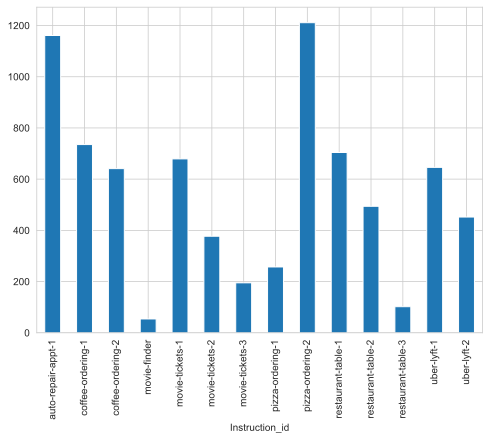

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
#df.groupby('Instruction_id').Consumer_complaint_narrative.count().plot.bar(ylim=0)
df.groupby('Instruction_id').Instruction_id.count().plot.bar(ylim=0)
plt.show()

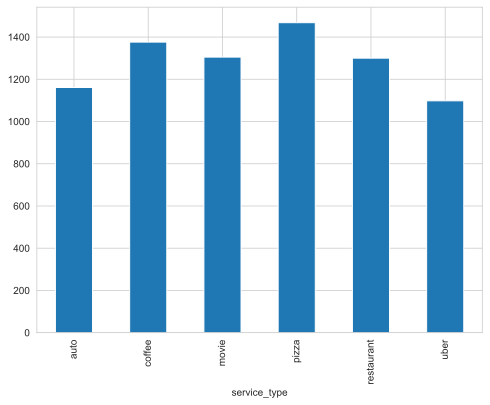

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
#df.groupby('Instruction_id').Consumer_complaint_narrative.count().plot.bar(ylim=0)
df.groupby('service_type').service_type.count().plot.bar(ylim=0)
plt.show()

#### Balance the Dataset

In [12]:
df_auto = df[df.service_type == 'auto']
df_auto = df_auto.sample(n=200)
df_coffee = df[df.service_type == 'coffee']
df_coffee = df_coffee.sample(n=200)
df_movie = df[df.service_type == 'movie']
df_movie = df_movie.sample(n=200)
df_pizza = df[df.service_type == 'pizza']
df_pizza = df_pizza.sample(n=200)
df_restaurant = df[df.service_type == 'restaurant']
df_restaurant = df_restaurant.sample(n=200)
df_uber = df[df.service_type == 'uber']
df_uber = df_uber.sample(n=200)

In [13]:
df2 = pd.concat([df_auto, df_coffee, df_movie, df_pizza, df_restaurant, df_uber], axis=0)


In [14]:
df2['category'] = df2['service_type'].factorize()[0]
corpus_df = df2

#### Reset the index on the dataframe

In [15]:
corpus_df = corpus_df.reset_index()

In [16]:
corpus_df

index                                        id  \
0      2323  dlg-4c980e78-674f-4f10-8845-b5c5d35640bd   
1      5993  dlg-c5a12cbf-ab9e-4d8d-8733-6dd12befb4aa   
2      4420  dlg-9164175a-98c1-40fc-b812-742d7819bb04   
3      2248  dlg-4a4e405d-0e9f-46ba-b9b9-ab165ca952ae   
4      1147  dlg-265e8747-20ea-49c3-870b-5925349548e1   
...     ...                                       ...   
1195   1100  dlg-24b07f6f-a00b-41bc-92d1-3ae383ae26b2   
1196   4067  dlg-85f7ab38-8d14-4248-8040-ff658c70c67e   
1197   6148  dlg-cb2c7eb5-982a-42ff-8bde-7d5470a07542   
1198   3761  dlg-7bcfd1b6-f18e-402a-ae24-6c1cbdf34cf9   
1199   2376  dlg-4dfa4a9b-b298-4479-bdc0-fff4c1a307e6   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Conversation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Hello, I need to make an appointment with Intelligent Auto Solutions to get some work done on my car. Ok, sounds good. Let me check with them.  Ok, thanks.  What type of car do you have?  2015 Honda Accord. Ok, what is the problem that you need to address?  I have a coolant leak and my car overheats intermittently. Ok, what

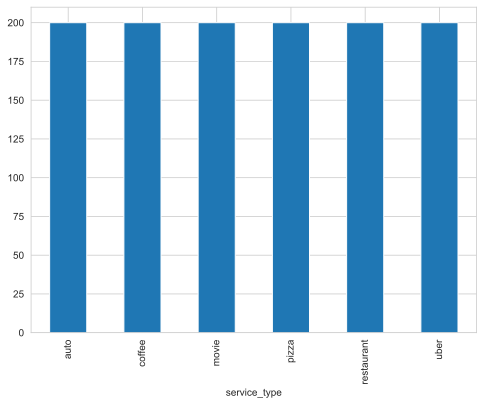

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
#df.groupby('Instruction_id').Consumer_complaint_narrative.count().plot.bar(ylim=0)
corpus_df.groupby('service_type').service_type.count().plot.bar(ylim=0)
plt.show()

### Get relevant columns

#### Word Embeddings

#### Do Some Additional CLeaning

In [18]:
corpus_df['Conversation'][0]

"Hello, I need to make an appointment with Intelligent Auto Solutions to get some work done on my car. Ok, sounds good. Let me check with them.  Ok, thanks.  What type of car do you have?  2015 Honda Accord. Ok, what is the problem that you need to address?  I have a coolant leak and my car overheats intermittently. Ok, what is your first and last name?  Jon Beatcort Ok, do you have a preference for when you want to bring the car in?  I'd like to bring it in as soon as possible. Ok, how about you drop it off at the night drop?  That would be good.  Is there any other matinenance that you would like done?  Yes, I also need to change the oil. Ok, I will schedule an oil change. Thanks, so I just drop the car off tonight?  Yes, that is all you need to do.  Ok, it sounds good. Can they also check the wipers?  I will tell them to also check the wipers.  That sounds great.  What time will you drop the car off tonight?  Is 8pm too late?  No, I have access to their online system, you can drop i

#### Clean the Text

In [19]:
# Cleaning the texts
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1200):
    review = re.sub('[^a-zA-Z]', ' ', corpus_df['Conversation'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus[0]

'ok googl pleas schedul appoint intellig auto solut day time ideal thursday closest appoint slot work anoth day would work sunday noon intellig auto solut open sunday anoth day would work ye next tuesday time ok appoint pm pm one time work ye take ok reserv appoint next tuesday intellig auto solut requir bit inform readi give addit inform vehicl ye make model vehicl vehicl toyota tundra ok year vehicl ok reason appoint dashboard button light gone ok succes made appoint electr issu toyota tundra next tuesday name number use appoint raymond fairfli thank appoint confirm'

---

# Feature Engineering

The features that will be explored are the following:

- [x] Bag of Words
- [x] Bag of N-Grams
- [x] TF-IDF
- [ ] Word2Vec
- [x] Glove
- [ ] FastText
- [x] Flair
- [ ] Bert 
- [ ] Elmo

## Bag of Words

In [20]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
cv = CountVectorizer(max_features = 500)
X_BagofWords = cv.fit_transform(corpus).toarray()
y = corpus_df.iloc[:, 5].values


In [21]:
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(X_BagofWords, columns=vocab)


abl  absolut  account  actual  ad  add  addit  address  adult  \
0       0        0        0       0   0    0      0        1      0   
1       0        0        0       1   0    0      0        0      0   
2       0        0        0       0   0    0      0        0      0   
3       0        0        0       0   0    0      0        0      0   
4       0        0        0       0   0    0      0        0      0   
...   ...      ...      ...     ...  ..  ...    ...      ...    ...   
1195    0        0        0       0   0    0      0        0      0   
1196    0        0        0       0   0    0      0        0      0   
1197    1        0        0       1   0    0      0        0      0   
1198    0        0        0       0   0    0      0        0      0   
1199    0        0        0       0   0    0      0        0      0   

      afternoon  ahead  airport  almond  alreadi  alright  ...  white  whole  \
0             0      0        0       0        0        0  ...      0      0   
1             1      0        0       0        0        0  ...      0      0   
2             0      0        0       0        0        0  ...      0      0   
3             1      2        0       0        1        1  ...      0      0   
4             0      0        0       0        0        0  ...      0      0   
...         ...    ...      ...     ...      ...      ...  ...    ...    ...   
1195          0      1        0       0        0        0  ...      0      0   
1196          0      0        0       0        0        0  ...      0      0   
1197          0      0        1       0        0        0  ...      0      0   
1198          0      0        0       0        0        0  ...      0      0   
1199          0      0        1       0        0        0  ...      0      0   

      wine  within  without  wonder  work  would  wow  wrong  xl  ye  yeah  \
0        0       0        0       0     1      2    0      0   0   3     0   
1        0       0        0       0     2      5    0      0   0   1     0   
2        0       0        0       0     1      1    0      0   0   4     0   
3        0       0        0       0     1      1    0      0   0   2     0   
4        0       0        0       0     0      0    0      0   0   1     0   
...    ...     ...      ...     ...   ...    ...  ...    ...  ..  ..   ...   
1195     0       0        0       0     0      0    0      0   1   0     0   
1196     0       0        0       0     4      0    0      0   0   0     0   
1197     0       0        0       0     0      0    0      0   0   1     2   
1198     0       0        0       0     0      8    0      0   0   0     0   
1199     0       0        0       0     0      2    0      0   0   4     0   

      year  yep  
0        0    0  
1        1    0  
2        0    0  
3        0    0  
4        0    0  
...    ...  ...  
1195     0    0  
1196     0    0  
1197     0    0  
1198     0    0  
1199     0    0  

[1200 rows x 500 columns]

### Topic Models

In [22]:
# TODO: Get back to this when doing review
#from sklearn.decomposition import LatentDirichletAllocation

#lda = LatentDirichletAllocation(n_components=6, max_iter=10000, random_state=0)
#dt_matrix = lda.fit_transform(X_BagofWords)
#features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3', 'T4', 'T5', 'T6'])
#features

### Show Topics and Their Weights

In [23]:
# TODO: Get back to this when doing review
#tt_matrix = lda.components_
#for topic_weights in tt_matrix:
#    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
#    topic = sorted(topic, key=lambda x: -x[1])
#    topic = [item for item in topic if item[1] > 0.6]
#   print(topic)
#   print()

### Clustering Documents Using Topic Model Features

In [24]:
# TODO: Get back to this when doing review
#from sklearn.cluster import KMeans

#km = KMeans(n_clusters=3, random_state=0)
#km.fit_transform(features)
#cluster_labels = km.labels_
#cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
#pd.concat([corpus_df, cluster_labels], axis=1)

## Bag of N-Grams

In [25]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
from sklearn.feature_extraction.text import CountVectorizer
bv = CountVectorizer(ngram_range=(2,2))
X_BagofNGrams = bv.fit_transform(corpus).toarray()
y = corpus_df.iloc[:, 5].values


In [26]:
vocab = bv.get_feature_names()
pd.DataFrame(X_BagofNGrams, columns=vocab)

ab light  abbi normal  abercorn street  abl acommad  abl add  \
0            0            0                0            0        0   
1            0            0                0            0        0   
2            0            0                0            0        0   
3            0            0                0            0        0   
4            0            0                0            0        0   
...        ...          ...              ...          ...      ...   
1195         0            0                0            0        0   
1196         0            0                0            0        0   
1197         0            0                0            0        0   
1198         0            0                0            0        0   
1199         0            0                0            0        0   

      abl arrang  abl book  abl bring  abl check  abl compromis  abl confirm  \
0              0         0          0          0              0            0   
1              0         0          0          0              0            0   
2              0         0          0          0              0            0   
3              0         0          0          0              0            0   
4              0         0          0          0              0            0   
...          ...       ...        ...        ...            ...          ...   
1195           0         0          0          0              0            0   
1196           0         0          0          0              0            0   
1197           0         0          0          0              0            0   
1198           0         0          0          0              0            0   
1199           0         0          0          0              0            0   

      abl convers  abl drive  abl find  abl get  ...  zelo owner  \
0               0          0         0        0  ...           0   
1               0          0         0        0  ...           0   
2               0          0         0        0  ...           0   
3               0          0         0        0  ...           0   
4               0          0         0        0  ...           0   
...           ...        ...       ...      ...  ...         ...   
1195            0          0         0        0  ...           0   
1196            0          0         0        0  ...           0   
1197            0          0         0        0  ...           0   
1198            0          0         0        0  ...           0   
1199            0          0         0        0  ...           0   

      zermatt resort  zesti italian  zip alright  zip code  zipcod one  \
0                  0              0            0         0           0   
1                  0              0            0         0           0   
2                  0              0            0         0           0   
3                  0              0            0         0           0   
4                  0              0            0         0           0   
...              ...            ...          ...       ...         ...   
1195               0              0            0         0           0   
1196               0              0            0         0           0   
1197               0              0            0         0           0   
1198               0              0            0         0           0   
1199               0              0            0         0           0   

      zipcod would  ziti great  ziti okay  zodo goleta  zoo type  zz sound  \
0                0           0          0            0         0         0   
1                0           0          0            0         0         0   
2                0           0          0            0         0         0   
3                0           0          0            0         0         0   
4                0           0          0            0         0         0   
...            ...         ...

## TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Get the TF-IDF Features
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
X_TFIDF = tv.fit_transform(corpus).toarray()
y = corpus_df.iloc[:, 5].values


In [28]:
vocab = tv.get_feature_names()
pd.DataFrame(np.round(X_TFIDF, 2), columns=vocab)

ab  abbi  abercorn  abl  abour  absinth  absolut  absolutley  abuelo  \
0    0.00  0.00      0.00 0.00   0.00     0.00     0.00        0.00    0.00   
1    0.00  0.00      0.00 0.00   0.00     0.00     0.00        0.00    0.00   
2    0.00  0.00      0.00 0.00   0.00     0.00     0.00        0.00    0.00   
3    0.00  0.00      0.00 0.00   0.00     0.00     0.00        0.00    0.00   
4    0.00  0.00      0.00 0.00   0.00     0.00     0.00        0.00    0.00   
...   ...   ...       ...  ...    ...      ...      ...         ...     ...   
1195 0.00  0.00      0.00 0.00   0.00     0.00     0.00        0.00    0.00   
1196 0.00  0.00      0.00 0.00   0.00     0.00     0.00        0.00    0.00   
1197 0.00  0.00      0.00 0.05   0.00     0.00     0.00        0.00    0.00   
1198 0.00  0.00      0.00 0.00   0.00     0.00     0.00        0.00    0.00   
1199 0.00  0.00      0.00 0.00   0.00     0.00     0.00        0.00    0.00   

      abut   ac  accel  acceler  accept  access  ...  yummi  yunman  yup  \
0     0.00 0.00   0.00     0.00    0.00    0.11  ...   0.00    0.00 0.00   
1     0.00 0.00   0.00     0.00    0.00    0.00  ...   0.00    0.00 0.00   
2     0.00 0.00   0.00     0.00    0.00    0.00  ...   0.00    0.00 0.00   
3     0.00 0.00   0.00     0.00    0.00    0.00  ...   0.00    0.00 0.00   
4     0.00 0.00   0.00     0.00    0.00    0.00  ...   0.00    0.00 0.00   
...    ...  ...    ...      ...     ...     ...  ...    ...     ...  ...   
1195  0.00 0.00   0.00     0.00    0.00    0.00  ...   0.00    0.00 0.00   
1196  0.00 0.00   0.00     0.00    0.00    0.00  ...   0.00    0.00 0.00   
1197  0.00 0.00   0.00     0.00    0.00    0.00  ...   0.00    0.00 0.00   
1198  0.00 0.00   0.00     0.00    0.00    0.00  ...   0.00    0.00 0.00   
1199  0.00 0.00   0.00     0.00    0.00    0.00  ...   0.00    0.00 0.00   

      yusho  zachari  zelo  zermatt  zesti  zip  zipcod  ziti  zodo  zoo   zz  \
0      0.00     0.00  0.00     0.00   0.00 0.00    0.00  0.00  0.00 0.00 0.00   
1      0.00     0.00  0.00     0.00   0.00 0.00    0.00  0.00  0.00 0.00 0.00   
2      0.00     0.00  0.00     0.00   0.00 0.00    0.00  0.00  0.00 0.00 0.00   
3      0.00     0.00  0.00     0.00   0.00 0.00    0.00  0.00  0.00 0.00 0.00   
4      0.00     0.00  0.00     0.00   0.00 0.00    0.00  0.00  0.00 0.00 0.00   
...     ...      ...   ...      ...    ...  ...     ...   ...   ...  ...  ...   
1195   0.00     0.00  0.00     0.00   0.00 0.00    0.00  0.00  0.00 0.00 0.00   
1196   0.00     0.00  0.00     0.00   0.00 0.00    0.00  0.00  0.00 0.00 0.00   
1197   0.00     0.00  0.00     0.00   0.00 0.00    0.00  0.00  0.00 0.00 0.00   
1198   0.00     0.00  0.00     0.00   0.00 0.00    0.00  0.00  0.00 0.00 0.00   
1199   0.00     0.00  0.00     0.00   0.00 0.00    0.00  0.00  0.00 0.00 0.00   

      zzzz  
0     0.00  
1     0.00  
2     0.00  
3     0.00  
4     0.00  
...    ...  
1195  0.00  
1196  0.00  
1197  0.00  
1198  0.00  
1199  0.00  

[1200 rows x 5052 columns]

### Document Similarity

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(X_TFIDF)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

0     1     2     3     4     5     6     7     8     9     10    11    \
0     1.00  0.21  0.21  0.14  0.17  0.16  0.09  0.18  0.23  0.14  0.19  0.32   
1     0.21  1.00  0.30  0.27  0.22  0.24  0.13  0.21  0.23  0.25  0.29  0.21   
2     0.21  0.30  1.00  0.30  0.18  0.24  0.16  0.31  0.35  0.16  0.29  0.26   
3     0.14  0.27  0.30  1.00  0.13  0.18  0.15  0.18  0.23  0.16  0.15  0.10   
4     0.17  0.22  0.18  0.13  1.00  0.14  0.06  0.21  0.23  0.13  0.17  0.16   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1195  0.01  0.02  0.02  0.04  0.03  0.03  0.01  0.04  0.03  0.04  0.05  0.02   
1196  0.21  0.16  0.11  0.10  0.13  0.07  0.05  0.11  0.11  0.04  0.12  0.21   
1197  0.07  0.10  0.06  0.06  0.04  0.06  0.04  0.06  0.07  0.04  0.06  0.03   
1198  0.15  0.12  0.08  0.04  0.07  0.12  0.05  0.07  0.09  0.08  0.13  0.12   
1199  0.14  0.13  0.07  0.03  0.10  0.04  0.06  0.06  0.05  0.05  0.14  0.14   

      12    13    14    ...  1185  1186  1187  1188  1189  1190  1191  1192  \
0     0.25  0.04  0.16  ...  0.06  0.16  0.08  0.05  0.06  0.13  0.06  0.08   
1     0.35  0.09  0.24  ...  0.05  0.09  0.16  0.07  0.03  0.13  0.06  0.09   
2     0.32  0.09  0.28  ...  0.04  0.08  0.06  0.02  0.02  0.08  0.05  0.06   
3     0.26  0.06  0.20  ...  0.03  0.13  0.10  0.04  0.03  0.05  0.03  0.05   
4     0.18  0.04  0.10  ...  0.04  0.08  0.09  0.05  0.02  0.08  0.04  0.07   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
1195  0.02  0.03  0.04  ...  0.06  0.04  0.07  0.06  0.24  0.03  0.03  0.14   
1196  0.14  0.01  0.11  ...  0.07  0.24  0.09  0.09  0.05  0.16  0.12  0.13   
1197  0.05  0.07  0.06  ...  0.13  0.10  0.11  0.14  0.05  0.04  0.17  0.07   
1198  0.14  0.04  0.12  ...  0.15  0.17  0.14  0.20  0.25  0.10  0.21  0.20   
1199  0.08  0.03  0.10  ...  0.15  0.18  0.18  0.19  0.12  0.10  0.27  0.21   

      1193  1194  1195  1196  1197  1198  1199  
0     0.07  0.07  0.01  0.21  0.07  0.15  0.14  
1     0.06  0.04  0.02  0.16  0.10  0.12  0.13  
2     0.03  0.04  0.02  0.11  0.06  0.08  0.07  
3     0.04  0.03  0.04  0.10  0.06  0.04  0.03  
4     0.04  0.02  0.03  0.13  0.04  0.07  0.10  
...    ...   ...   ...   ...   ...   ...   ...  
1195  0.01  0.03  1.00  0.06  0.06  0.10  0.06  
1196  0.15  0.13  0.06  1.00  0.08  0.14  0.15  
1197  0.08  0.04  0.06  0.08  1.00  0.10  0.13  
1198  0.20  0.05  0.10  0.14  0.10  1.00  0.29  
1199  0.26  0.08  0.06  0.15  0.13  0.29  1.00  

[1200 rows x 1200 columns]

### Clustering Documents Using Similarity Features

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

Document\Cluster 1 Document\Cluster 2 Distance Cluster Size
0                216.00             312.00     0.28         2.00
1               1089.00            1115.00     0.72         2.00
2                689.00             795.00     0.81         2.00
3                307.00             362.00     1.00         2.00
4                 46.00              86.00     1.00         2.00
...                 ...                ...      ...          ...
1194            2388.00            2393.00    27.67       408.00
1195            2389.00            2394.00    34.71       607.00
1196            2391.00            2392.00    39.30       401.00
1197            2390.00            2395.00    41.59       799.00
1198            2396.00            2397.00    53.82      1200.00

[1199 rows x 4 columns]

Text(0, 0.5, 'Distance')

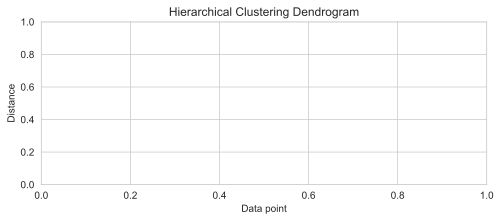

In [31]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
#dendrogram(Z)
#plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [32]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

index                                        id  \
0      2323  dlg-4c980e78-674f-4f10-8845-b5c5d35640bd   
1      5993  dlg-c5a12cbf-ab9e-4d8d-8733-6dd12befb4aa   
2      4420  dlg-9164175a-98c1-40fc-b812-742d7819bb04   
3      2248  dlg-4a4e405d-0e9f-46ba-b9b9-ab165ca952ae   
4      1147  dlg-265e8747-20ea-49c3-870b-5925349548e1   
...     ...                                       ...   
1195   1100  dlg-24b07f6f-a00b-41bc-92d1-3ae383ae26b2   
1196   4067  dlg-85f7ab38-8d14-4248-8040-ff658c70c67e   
1197   6148  dlg-cb2c7eb5-982a-42ff-8bde-7d5470a07542   
1198   3761  dlg-7bcfd1b6-f18e-402a-ae24-6c1cbdf34cf9   
1199   2376  dlg-4dfa4a9b-b298-4479-bdc0-fff4c1a307e6   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Conversation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Hello, I need to make an appointment with Intelligent Auto Solutions to get some work done on my car. Ok, sounds good. Let me check with them.  Ok, thanks.  What type of car do you have?  2015 Honda Accord. Ok, what is the problem that you need to address?  I have a coolant leak and my car overheats intermittently. Ok, what

## Word2Vec

Implementing a Word2Vec model using a CBOW (Continuous Bag of Words) neural network architecture

### Build Vocabulary

In [33]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(corpus)
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in corpus]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

ModuleNotFoundError: No module named 'keras'

In [36]:
list(word2id.items())[:10]

[('like', 1),
 ('would', 2),
 ('ok', 3),
 ('thank', 4),
 ('okay', 5),
 ('ye', 6),
 ('want', 7),
 ('order', 8),
 ('pm', 9),
 ('pizza', 10)]

### Build (context_words, target_word) Pair Generator

In [37]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [38]:
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['want', 'schedul', 'car', 'sure'] -> Target (Y): appoint
Context (X): ['schedul', 'appoint', 'sure', 'kind'] -> Target (Y): car
Context (X): ['appoint', 'car', 'kind', 'appoint'] -> Target (Y): sure
Context (X): ['car', 'sure', 'appoint', 'gener'] -> Target (Y): kind
Context (X): ['sure', 'kind', 'gener', 'check'] -> Target (Y): appoint
Context (X): ['kind', 'appoint', 'check', 'appoint'] -> Target (Y): gener
Context (X): ['appoint', 'gener', 'appoint', 'usual'] -> Target (Y): check
Context (X): ['gener', 'check', 'usual', 'place'] -> Target (Y): appoint
Context (X): ['check', 'appoint', 'place', 'ye'] -> Target (Y): usual
Context (X): ['appoint', 'usual', 'ye', 'place'] -> Target (Y): place
Context (X): ['usual', 'place', 'place', 'usual'] -> Target (Y): ye


### Build CBOW Deep Network Model

In [39]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))

cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
print(cbow.summary())

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 100)            501800    
_________________________________________________________________
lambda_1 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5018)              506818    
Total params: 1,008,618
Trainable params: 1,008,618
Non-trainable params: 0
_________________________________________________________________
None


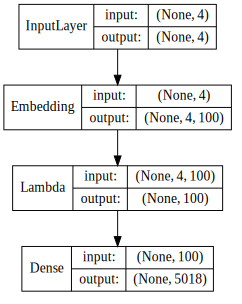

In [40]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, dpi=70, rankdir='TB').create(prog='dot', format='svg'))

In [42]:
# TODO: Run this when in Review (Get all other items done first)
#for epoch in range(1, 2):
#    loss = 0.
#    i = 0
#    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
#        i += 1
#        loss += cbow.train_on_batch(x, y)
#        if i % 100000 == 0:
#            print('Processed {} (context, word) pairs'.format(i))

#    print('Epoch:', epoch, '\tLoss:', loss)
#    print()

## Glove

In [34]:
import spacy

nlp = spacy.load('en_vecs')

total_vectors = len(nlp.vocab.vectors)
print('Total word vectors:', total_vectors)

Total word vectors: 1070971


### Visualize GloVe Word Embeddings

In [35]:
unique_words = list(set([word for sublist in [doc.split() for doc in corpus] for word in sublist]))

word_glove_vectors = np.array([nlp(word).vector for word in unique_words])
pd.DataFrame(word_glove_vectors, index=unique_words)

0     1     2     3     4     5     6     7     8     9     10   \
mine     -0.01 -0.26 -0.06 -0.32 -0.21  0.10 -0.06 -0.47 -0.50  2.12 -0.61   
relli     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
nicol    -0.43  0.06  0.39 -0.03 -0.49 -0.23  0.27  0.51 -0.97 -1.42  0.72   
drive     0.57  0.50  0.07 -0.42  0.08  0.01  0.22 -0.17  0.35  1.96  0.44   
sweetner -0.20  0.20  0.30 -0.48  0.00  0.59 -0.38  0.73 -0.36 -1.24 -0.48   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
chip     -0.01  0.39  0.73 -0.09  0.54 -0.03 -0.28 -0.06  0.40  0.43  0.11   
rochel    0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
gotta    -0.16 -0.19  0.02 -0.03  0.19  0.08  0.25 -0.25  0.07  1.32 -0.20   
hold     -0.11 -0.12 -0.13  0.23  0.38 -0.39 -0.47  0.15  0.15  2.42 -0.08   
ut       -0.05 -0.05 -0.10 -0.57  0.37  0.09  0.52  0.03  0.07  0.47 -0.23   

           11    12    13    14   ...   285   286   287   288   289   290  \
mine      0.24  0.41 -0.33  0.03  ...  0.14  0.04  0.42 -0.22 -0.11 -0.80   
relli     0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00   
nicol    -0.28  0.56 -0.16  0.01  ...  0.03 -0.46 -0.33 -0.22 -0.23  0.56   
drive     0.05 -0.08  0.02 -0.87  ... -0.55 -0.29 -0.63 -0.09 -0.40 -0.55   
sweetner  0.61 -0.62  0.61  0.36  ... -0.37  0.90 -0.24 -0.28  0.50  0.73   
...        ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
chip     -0.07  0.47 -0.37 -0.27  ... -0.10 -0.53  0.06 -0.04 -0.18 -1.21   
rochel    0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00   
gotta    -0.01  0.29 -0.25 -0.21  ... -0.03  0.42 -0.32 -0.22  0.39  0.09   
hold      0.12  0.22 -0.25 -0.11  ... -0.26  0.12  0.05  0.27  0.25 -0.09   
ut        0.09  0.60  0.02  0.42  ... -0.32  0.33  0.06 -0.06  0.34 -0.01   

           291   292   293   294   295   296   297   298   299  
mine     -0.05  0.27  0.19  0.47 -0.17  0.05 -0.28 -0.33  0.33  
relli     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
nicol     0.19 -0.38 -0.58  0.56  0.03 -0.18 -0.27  0.30 -0.08  
drive     0.41  0.15 -0.20 -0.03 -0.28  0.41  0.59 -0.03 -0.26  
sweetner  0.02 -0.19 -0.40 -0.34  0.14 -0.37 -1.10  0.04  0.57  
...        ...   ...   ...   ...   ...   ...   ...   ...   ...  
chip      0.24 -0.14 -0.39  0.00  0.21  0.68 -0.48 -0.33  0.79  
rochel    0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
gotta    -0.28 -0.14  0.24  0.68 -0.30  0.10  0.18  0.02 -0.01  
hold      0.45 -0.04 -0.63 -0.10  0.11 -0.11 -0.29  0.31 -0.15  
ut       -0.13 -0.23 -0.06  1.00 -0.96  0.66  0.13 -0.43 -0.12  

[5070 rows x 300 columns]

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_glove_vectors)
labels = unique_words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

### Cluster documents with GloVe Embeddings

In [37]:
from sklearn.cluster import KMeans
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in corpus])

km = KMeans(n_clusters=6, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

index                                        id  \
0      2323  dlg-4c980e78-674f-4f10-8845-b5c5d35640bd   
1      5993  dlg-c5a12cbf-ab9e-4d8d-8733-6dd12befb4aa   
2      4420  dlg-9164175a-98c1-40fc-b812-742d7819bb04   
3      2248  dlg-4a4e405d-0e9f-46ba-b9b9-ab165ca952ae   
4      1147  dlg-265e8747-20ea-49c3-870b-5925349548e1   
...     ...                                       ...   
1195   1100  dlg-24b07f6f-a00b-41bc-92d1-3ae383ae26b2   
1196   4067  dlg-85f7ab38-8d14-4248-8040-ff658c70c67e   
1197   6148  dlg-cb2c7eb5-982a-42ff-8bde-7d5470a07542   
1198   3761  dlg-7bcfd1b6-f18e-402a-ae24-6c1cbdf34cf9   
1199   2376  dlg-4dfa4a9b-b298-4479-bdc0-fff4c1a307e6   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Conversation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Hello, I need to make an appointment with Intelligent Auto Solutions to get some work done on my car. Ok, sounds good. Let me check with them.  Ok, thanks.  What type of car do you have?  2015 Honda Accord. Ok, what is the problem that you need to address?  I have a coolant leak and my car overheats intermittently. Ok, what

## FastText

### Leveraging gensim for building a FastText model

In [38]:
from gensim.models.fasttext import FastText

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in corpus]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 50          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words


ft_model = FastText(tokenized_corpus, size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=1, iter=50)


In [39]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in ft_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['like', 'would', 'ok', 'thank', 'ye', 'want', 'order', 'pm', 'pizza']}
similar_words

{'like': ['would', 'ye', 'pleas', 'want', 'great'],
 'would': ['like', 'ye', 'pleas', 'want', 'great'],
 'ok': ['want', 'ye', 'fine', 'like', 'one'],
 'thank': ['ye', 'welcom', 'pleas', 'anyth', 'great'],
 'ye': ['like', 'would', 'pleas', 'thank', 'want'],
 'want': ['like', 'get', 'ye', 'would', 'one'],
 'order': ['readi', 'size', 'pickup', 'receipt', 'larg'],
 'pm': ['seat', 'time', 'reserv', 'book', 'tabl'],
 'pizza': ['larg', 'pepperoni', 'chees', 'sausag', 'mushroom']}

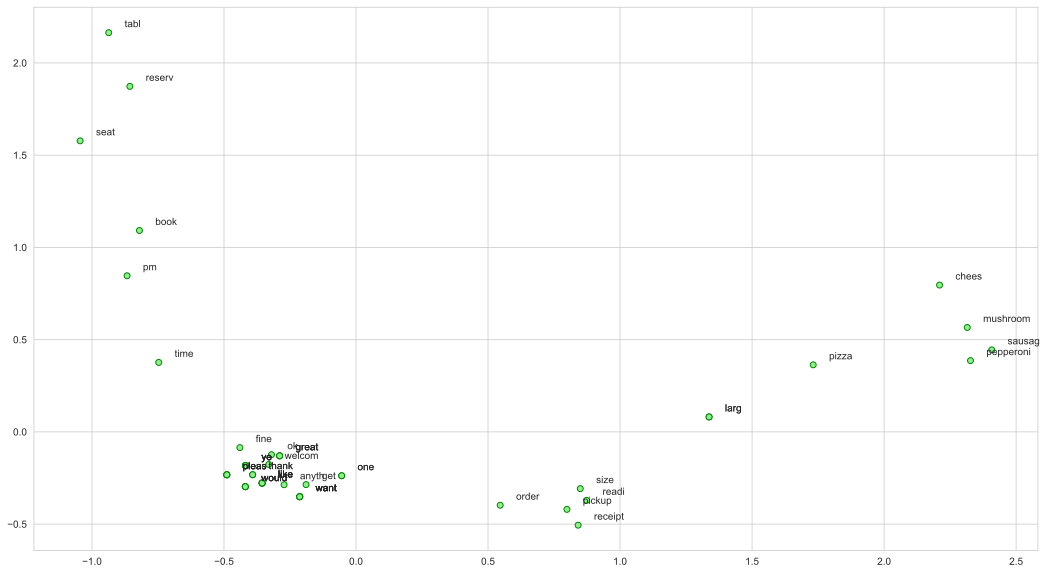

In [40]:
from sklearn.decomposition import PCA

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = ft_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 10))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

In [41]:
ft_model.wv['pizza']

array([ 0.23109561, -0.19410664,  0.09403679,  0.14584818, -0.08310679,
       -0.41478863, -0.02611819,  0.02234999, -0.11864965,  0.00490218,
        0.00157662, -0.13574152,  0.0924443 ,  0.00705057, -0.12714878,
        0.30828473, -0.16946979, -0.0687562 ,  0.05241657,  0.2756915 ,
       -0.05819442,  0.5657727 ,  0.19162771,  0.29174855,  0.36816838,
       -0.30534443,  0.1236502 ,  0.5793592 ,  0.12352773, -0.5712898 ,
        0.5531859 ,  0.26045752,  0.09531733, -0.11367857,  0.19506687,
       -0.10057876, -0.2364173 , -0.21496099, -0.22400865,  0.11777086,
        0.32622832,  0.251942  ,  0.42147058, -0.2737934 ,  0.25965735,
        0.1048834 ,  0.12343585,  0.06856177,  0.07358574,  0.24670754,
       -0.03334866,  0.3178425 ,  0.29949328,  0.6309794 , -0.02107426,
       -0.01664493, -0.12415545,  0.08233146, -0.6675948 ,  0.03340888,
        0.0633432 ,  0.19281964, -0.09733599,  0.12679905, -0.19563767,
       -0.03963894,  0.05490664, -0.16451707, -0.01939095, -0.10

In [42]:
print(ft_model.wv.similarity(w1='pizza', w2='delivery'))
print(ft_model.wv.similarity(w1='car', w2='coffee'))

0.6784317
0.36337486


In [50]:
corpus_df

index                                        id  \
0      2323  dlg-4c980e78-674f-4f10-8845-b5c5d35640bd   
1      5993  dlg-c5a12cbf-ab9e-4d8d-8733-6dd12befb4aa   
2      4420  dlg-9164175a-98c1-40fc-b812-742d7819bb04   
3      2248  dlg-4a4e405d-0e9f-46ba-b9b9-ab165ca952ae   
4      1147  dlg-265e8747-20ea-49c3-870b-5925349548e1   
...     ...                                       ...   
1195   1100  dlg-24b07f6f-a00b-41bc-92d1-3ae383ae26b2   
1196   4067  dlg-85f7ab38-8d14-4248-8040-ff658c70c67e   
1197   6148  dlg-cb2c7eb5-982a-42ff-8bde-7d5470a07542   
1198   3761  dlg-7bcfd1b6-f18e-402a-ae24-6c1cbdf34cf9   
1199   2376  dlg-4dfa4a9b-b298-4479-bdc0-fff4c1a307e6   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Conversation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Hello, I need to make an appointment with Intelligent Auto Solutions to get some work done on my car. Ok, sounds good. Let me check with them.  Ok, thanks.  What type of car do you have?  2015 Honda Accord. Ok, what is the problem that you need to address?  I have a coolant leak and my car overheats intermittently. Ok, what

## Flair

In [65]:
#flair_df = corpus_df['category', 'Conversation']
data = corpus_df[['category', 'Conversation']]
data.columns = ['label', 'text']
data

label  \
0         0   
1         0   
2         0   
3         0   
4         0   
...     ...   
1195      5   
1196      5   
1197      5   
1198      5   
1199      5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 text  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Hello, I need to make an appointment with Intelligent Auto Solutions to get some work done on my car. Ok, sounds good. Let me check with them.  Ok, thanks.  What type of car do you have?  2015 Honda Accord. Ok, what is the problem that you need to address?  I have a coolant leak and my car overheats intermittently. Ok, what is your first and last name?  Jon Beatcort Ok, do you have a preference for when you want to bring the car in?  I'd like to bring it in as soon as possible. Ok, how about you drop it off at the night drop?  That would be good.  Is there any other matinenance that you would like done?  Yes, I also need to change the oil. Ok, I will schedule an oil change. Thanks, so I just drop the car off tonight?  Yes, that is all you need to do.  Ok, it sounds good. Can they also check the wipers?  I will tell the

In [66]:
data['label'] = '__label__' + data['label'].astype(str)
data.iloc[0:int(len(data)*0.8)].to_csv('train.csv', sep='\t', index = False, header = False)
data.iloc[int(len(data)*0.8):int(len(data)*0.9)].to_csv('test.csv', sep='\t', index = False, header = False)
data.iloc[int(len(data)*0.9):].to_csv('dev.csv', sep='\t', index = False, header = False);

C:\Users\pauld\Anaconda3\envs\CP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Training a Custom Text Classification Model

In [67]:
from flair.data_fetcher import NLPTaskDataFetcher
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentLSTMEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
corpus = NLPTaskDataFetcher.load_classification_corpus(Path('./'), test_file='test.csv', dev_file='dev.csv', train_file='train.csv')
word_embeddings = [WordEmbeddings('glove'), FlairEmbeddings('news-forward-fast'), FlairEmbeddings('news-backward-fast')]
document_embeddings = DocumentLSTMEmbeddings(word_embeddings, hidden_size=512, reproject_words=True, reproject_words_dimension=256)
classifier = TextClassifier(document_embeddings, label_dictionary=corpus.make_label_dictionary(), multi_label=False)
trainer = ModelTrainer(classifier, corpus)
trainer.train('./', max_epochs=2)

2020-04-10 18:33:04,313 Reading data from .
2020-04-10 18:33:04,313 Train: train.csv
2020-04-10 18:33:04,314 Dev: dev.csv
2020-04-10 18:33:04,314 Test: test.csv


C:\Users\pauld\Anaconda3\envs\CP\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated function (or staticmethod) load_classification_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  


2020-04-10 18:33:09,672 Computing label dictionary. Progress:


C:\Users\pauld\Anaconda3\envs\CP\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated class DocumentLSTMEmbeddings. (The functionality of this class is moved to 'DocumentRNNEmbeddings') -- Deprecated since version 0.4.
  
100%|████████████████████████████████████████████████████████████████████████████| 960/960 [00:00<00:00, 320864.76it/s]

2020-04-10 18:33:09,680 [b'0', b'1', b'2', b'3', b'4']
2020-04-10 18:33:09,683 ----------------------------------------------------------------------------------------------------
2020-04-10 18:33:09,683 Model: "TextClassifier(
  (document_embeddings): DocumentLSTMEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=2148, 

2020-04-10 18:34:37,016 epoch 1 - iter 3/30 - loss 1.64346719 - samples/sec: 1.10
2020-04-10 18:36:10,746 epoch 1 - iter 6/30 - loss 1.63137533 - samples/sec: 1.03
2020-04-10 18:37:49,946 epoch 1 - iter 9/30 - loss 1.63727219 - samples/sec: 0.97
2020-04-10 18:39:13,442 epoch 1 - iter 12/30 - loss 1.63431949 - samples/sec: 1.15
2020-04-10 18:40:46,504 epoch 1 - iter 15/30 - loss 1.63171929 - samples/sec: 1.03
2020-04-10 18:42:11,223 epoch 1 - iter 18/30 - loss 1.62841382 - samples/sec: 1.14
2020-04-10 18:44:42,299 epoch 1 - iter 21/30 - loss 1.63285765 - samples/sec: 0.64
2020-04-10 18:46:13,431 epoch 1 - iter 24/30 - loss 1.62680884 - samples/sec: 1.06
2020-04-10 18:48:15,806 epoch 1 - iter 27/30 - loss 1.62617431 - samples/sec: 0.79
2020-04-10 18:49:56,057 epoch 1 - iter 30/30 - loss 1.62745380 - samples/sec: 0.96
2020-04-10 18:49:56,219 ----------------------------------------------------------------------------------------------------
2020-04-10 18:49:56,220 EPOCH 1 done: loss 1.627

C:\Users\pauld\Anaconda3\envs\CP\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DocumentLSTMEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\pauld\Anaconda3\envs\CP\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\pauld\Anaconda3\envs\CP\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\pauld\Anaconda3\envs\CP\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type FlairEmbeddings. It won't be checked for correctness upon l

2020-04-10 18:51:12,665 ----------------------------------------------------------------------------------------------------


C:\Users\pauld\Anaconda3\envs\CP\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\pauld\Anaconda3\envs\CP\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\pauld\Anaconda3\envs\CP\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type GRU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


2020-04-10 18:52:16,240 epoch 2 - iter 3/30 - loss 1.62768479 - samples/sec: 1.51
2020-04-10 18:53:27,211 epoch 2 - iter 6/30 - loss 1.62581978 - samples/sec: 1.36
2020-04-10 18:54:40,548 epoch 2 - iter 9/30 - loss 1.61957239 - samples/sec: 1.31
2020-04-10 18:55:55,482 epoch 2 - iter 12/30 - loss 1.61865876 - samples/sec: 1.28
2020-04-10 18:57:03,463 epoch 2 - iter 15/30 - loss 1.61756767 - samples/sec: 1.42
2020-04-10 18:58:20,376 epoch 2 - iter 18/30 - loss 1.61379518 - samples/sec: 1.25
2020-04-10 18:59:27,544 epoch 2 - iter 21/30 - loss 1.60984237 - samples/sec: 1.43
2020-04-10 19:00:37,592 epoch 2 - iter 24/30 - loss 1.60985236 - samples/sec: 1.37
2020-04-10 19:01:47,117 epoch 2 - iter 27/30 - loss 1.60802420 - samples/sec: 1.38
2020-04-10 19:03:36,369 epoch 2 - iter 30/30 - loss 1.61202425 - samples/sec: 0.88
2020-04-10 19:03:36,542 ----------------------------------------------------------------------------------------------------
2020-04-10 19:03:36,543 EPOCH 2 done: loss 1.612

{'test_score': 0.0,
 'dev_score_history': [0.0, 0.0],
 'train_loss_history': [1.6274538000424703, 1.6120242476463318],
 'dev_loss_history': [tensor(1.9729), tensor(1.6752)]}

### Using the Trained Model for Predictions

In [72]:
from flair.models import TextClassifier
from flair.data import Sentence
#classifier = TextClassifier.load_from_file('./best-model.pt')
classifier = TextClassifier.load('./best-model.pt')
sentence = Sentence("Google order me a ride. Ok in your location? and to where? from JFK Airport to 409 E 14th St, New York, NY OK is that 409 E 14th St, New York, NY 10009? Yes what kind of ride would you love to have? Is Uber X available? yes, would you like to know the fare for that one? yes please Booking fee  0,𝑀𝑖𝑛𝑖𝑚𝑢𝑚𝑓𝑎𝑟𝑒 8 Per-mile $1.62 Ok that's perfect. ok finding the closest Uber X for you... the closes one is about 15 minutes from now. Is that ok with you? is their any available car near? The closest one is 15 minutes. Is that ok with you? Yes Ordering your ride now, your ride is on the ")
classifier.predict(sentence)
print(sentence.labels)

2020-04-10 20:48:19,155 loading file ./best-model.pt
[3 (0.28113481402397156)]


## Bert

## Elmo

---

# Feature Selection

#### Naive Bayes Model

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [40]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


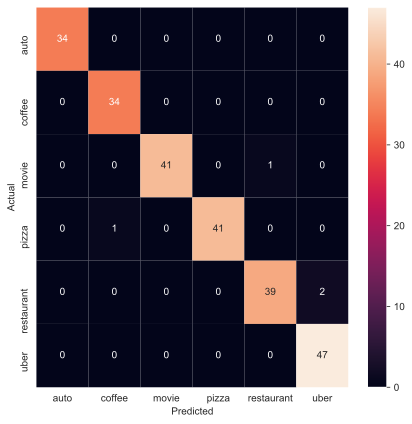

In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['auto', 'coffee', 'movie', 'pizza', 'restaurant', 'uber'], yticklabels=['auto', 'coffee', 'movie', 'pizza', 'restaurant', 'uber'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [43]:
# View the Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9833333333333333

In [44]:
# View the f1-score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)


array([1.        , 0.98550725, 0.98795181, 0.98795181, 0.96296296,
       0.97916667])

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=['auto', 'coffee', 'movie', 'pizza', 'restaurant', 'uber']))

              precision    recall  f1-score   support

        auto       1.00      1.00      1.00        34
      coffee       0.97      1.00      0.99        34
       movie       1.00      0.98      0.99        42
       pizza       1.00      0.98      0.99        42
  restaurant       0.97      0.95      0.96        41
        uber       0.96      1.00      0.98        47

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



#### Build Vocabulary

In [134]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
cv_matrix = cv.fit_transform(corpus).toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [135]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
df_vocab = pd.DataFrame(cv_matrix, columns=vocab)
df_vocab

abl  absolut  account  actual  ad  add  addit  address  adult  \
0       0        0        0       0   0    0      0        0      0   
1       1        0        0       0   0    0      0        4      0   
2       0        0        0       0   2    0      0        0      0   
3       0        0        0       0   0    0      0        0      0   
4       0        0        0       0   0    0      0        0      0   
...   ...      ...      ...     ...  ..  ...    ...      ...    ...   
1195    0        0        0       0   0    0      0        0      0   
1196    0        0        0       0   0    0      0        0      0   
1197    0        0        0       0   1    0      0        0      0   
1198    0        0        1       0   0    0      0        0      0   
1199    0        0        0       0   0    0      0        0      0   

      afternoon  ahead  airport  almond  alreadi  alright  ...  wife  window  \
0             0      0        0       0        0        0  ...     0       0   
1             0      0        0       0        0        0  ...     0       0   
2             0      1        0       0        0        4  ...     0       0   
3             0      0        0       0        0        0  ...     0       0   
4             2      0        0       0        0        0  ...     0       0   
...         ...    ...      ...     ...      ...      ...  ...   ...     ...   
1195          0      0        0       0        0        0  ...     0       0   
1196          0      0        2       0        0        0  ...     0       0   
1197          0      0        0       0        0        0  ...     0       0   
1198          0      0        0       0        1        0  ...     0       0   
1199          0      0        0       0        0        0  ...     0       0   

      wine  within  wonder  work  would  wow  wrong  xl  ye  yeah  year  yep  \
0        0       0       0     1      1    0      0   0   1     1     0    0   
1        0       0       0     0      0    0      0   0   5     0     1    0   
2        0       0       0     0      2    0      1   0   2     0     0    0   
3        0       1       0     2      0    0      0   0   1     0     0    0   
4        0       0       0     1      0    0      1   0   0     0     0    0   
...    ...     ...     ...   ...    ...  ...    ...  ..  ..   ...   ...  ...   
1195     0       0       0     1      6    0      0   0   3     0     0    0   
1196     0       0       0     0      0    0      0   0   2     1     0    0   
1197     0       0       0     1      6    0      0   1   3     0     0    0   
1198     0       0       0     0      0    0      0   1   0     0     0    0   
1199     0       0       0     0      1    0      0   0   0     1     0    0   

      york  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
1195     0  
1196     1  
1197     0  
1198     0  
1199     0  

[1200 rows x 500 columns]

## Feature Selection

### 1. Univariate Selection

In [48]:
SelectKBest?

In [47]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

array = df_vocab.values
X = array[:,0:499]
Y = array[:,499]
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:200,:])

[1.714e-01 5.741e-01 4.088e+00 1.482e-01 5.987e-01 2.803e-01 4.178e+00
 5.182e-01 4.556e-01 9.887e-01 1.691e-01 6.993e-01 7.159e-02 3.558e-01
 2.323e+00 1.589e+00 1.197e+00 1.105e+00 3.240e-01 4.018e-01 1.002e+00
 1.544e+01 4.140e-01 1.224e+00 3.646e-02 2.727e-01 3.362e-01 3.363e+00
 1.989e-01 7.826e-02 1.105e+00 8.231e-01 1.039e+00 3.672e-01 3.766e-01
 4.218e-02 1.442e+00 8.015e-01 1.277e+01 4.383e-02 2.512e+00 6.739e-02
 2.490e-02 2.392e-01 1.139e+00 5.472e-02 7.639e+00 1.901e-01 4.341e-01
 1.007e+00 1.122e+00 4.441e+00 2.892e-01 2.716e-01 2.603e-01 1.703e-01
 5.832e-01 3.717e-01 3.662e-01 2.379e-02 7.213e+00 4.647e-01 4.056e-01
 6.525e-01 1.268e+00 1.453e+00 9.120e-02 5.069e-01 3.788e-01 5.941e-01
 6.180e-01 2.143e+00 5.650e-01 3.681e-01 2.232e+00 1.629e-01 2.171e-01
 1.684e-01 6.840e-01 5.018e+00 1.647e-01 3.021e-01 4.000e-01 4.425e-01
 1.526e-01 4.983e-01 2.441e-01 4.284e-01 2.868e-01 3.004e-02 1.936e-01
 6.863e-01 1.146e-01 3.335e-01 2.032e+00 1.219e+00 2.475e-01 4.641e+00
 4.422

### 2. Recursive Feature Elimination

In [120]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = df_vocab.values
X = array[:,0:5720]
Y = array[:,1000]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 20)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

KeyboardInterrupt: 

### 3. Principal Component Analysis

In [ ]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA

array = df_vocab.values
X = array[:,0:5720]
Y = array[:,1000]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

### 4. Feature Importance

In [101]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

array = df_vocab.values
X = array[:,0:5720]
Y = array[:,1000]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0. 0. 0. ... 0. 0. 0.]


# Bag of NGrams Model

In [102]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

abe find  abercorn street  able acommadate  able add  able anything  \
0           0                0                0         0              0   
1           0                0                0         0              0   
2           0                0                0         0              0   
3           0                0                0         0              0   
4           0                0                0         0              0   
..        ...              ...              ...       ...            ...   
995         0                0                0         0              0   
996         0                0                0         0              0   
997         0                0                0         0              0   
998         0                0                0         0              0   
999         0                0                0         0              0   

     able apply  able book  able call  able check  able chicken  able choose  \
0             0          0          0           0             0            0   
1             0          0          0           0             0            0   
2             0          0          0           0             0            0   
3             0          0          0           0             0            0   
4             0          0          0           0             0            0   
..          ...        ...        ...         ...           ...          ...   
995           0          0          0           0             0            0   
996           0          0          0           0             0            0   
997           0          0          0           0             0            0   
998           0          0          0           0             0            0   
999           0          0          0           0             0            0   

     able confirm  able drop  able find  able fit  ...  zermatt resort  \
0               0          0          0         0  ...               0   
1               0          0          0         0  ...               0   
2               0          0          0         0  ...               0   
3               0          0          0         0  ...               0   
4               0          0          0         0  ...               0   
..            ...        ...        ...       ...  ...             ...   
995             0          0          0         0  ...               0   
996             0          0          0         0  ...               0   
997             0          0          0         0  ...               0   
998             0          0          0         0  ...               0   
999             0          0          0         0  ...               0   

     zesty italian  zimmer phone  zio near  zio pm  zio yes  zip code  \
0                0             0         0       0        0         0   
1                0             0         0       0        0         0   
2                0             0         0       0        0         0   
3                0             0         0       0        0         0   
4                0             0         0       0        0         0   
..             ...           ...       ...     ...      ...       ...   
995              0             0         0       0        0         0   
996              0             0         0       0        0         0   
997              0             0         0       0        0         0   
998              0             0         0       0        0         0   
999              0             0         0       0        0         0   

     zipcode elm  zipcode would  zoe please  zone way  zoo dr  zoo ok  \
0              0              0           0         0       0       0   
1              0              0           0         0       0       0   
2              0              0           0         0       0       0   
3              0              0           0         0       0       0   


# TF-IDF Model

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

abdul  abe  abercorn  able  abother  abour  aboutthe  absolutely  \
0     0.00 0.00      0.00  0.00     0.00   0.00      0.00        0.00   
1     0.00 0.00      0.00  0.00     0.00   0.00      0.00        0.00   
2     0.00 0.00      0.00  0.00     0.00   0.00      0.00        0.00   
3     0.00 0.00      0.00  0.00     0.00   0.00      0.00        0.00   
4     0.00 0.00      0.00  0.00     0.00   0.00      0.00        0.00   
..     ...  ...       ...   ...      ...    ...       ...         ...   
995   0.00 0.00      0.00  0.00     0.00   0.00      0.00        0.00   
996   0.00 0.00      0.00  0.00     0.00   0.00      0.00        0.00   
997   0.00 0.00      0.00  0.11     0.00   0.00      0.00        0.00   
998   0.00 0.00      0.00  0.00     0.00   0.00      0.00        0.00   
999   0.00 0.00      0.00  0.00     0.00   0.00      0.00        0.00   

     absolutley  accept  acceptable  accepting  accepts  access  \
0          0.00    0.00        0.00       0.00     0.00    0.00   
1          0.00    0.00        0.00       0.00     0.00    0.00   
2          0.00    0.00        0.00       0.00     0.00    0.00   
3          0.00    0.00        0.00       0.00     0.00    0.00   
4          0.00    0.00        0.00       0.00     0.00    0.00   
..          ...     ...         ...        ...      ...     ...   
995        0.00    0.00        0.00       0.00     0.00    0.00   
996        0.00    0.00        0.00       0.00     0.00    0.00   
997        0.00    0.00        0.00       0.00     0.00    0.00   
998        0.00    0.00        0.00       0.00     0.00    0.00   
999        0.00    0.00        0.00       0.00     0.00    0.00   

     accessibility  ...   za  zanker  zap  zatinya  zaytinya  zaza  zermatt  \
0             0.00  ... 0.00    0.00 0.00     0.00      0.00  0.00     0.00   
1             0.00  ... 0.00    0.00 0.00     0.00      0.00  0.00     0.00   
2             0.00  ... 0.00    0.00 0.00     0.00      0.00  0.00     0.00   
3             0.00  ... 0.00    0.00 0.00     0.00      0.00  0.00     0.00   
4             0.00  ... 0.00    0.00 0.00     0.00      0.00  0.00     0.00   
..             ...  ...  ...     ...  ...      ...       ...   ...      ...   
995           0.00  ... 0.00    0.00 0.00     0.00      0.00  0.00     0.00   
996           0.00  ... 0.00    0.00 0.00     0.00      0.00  0.00     0.00   
997           0.00  ... 0.00    0.00 0.00     0.00      0.00  0.00     0.00   
998           0.00  ... 0.00    0.00 0.00     0.00      0.00  0.00     0.00   
999           0.00  ... 0.00    0.00 0.00     0.00      0.00  0.00     0.00   

     zesty  zimmer  zio  zip  zipcode  zoe  zone  zoo  
0     0.00    0.00 0.00 0.00     0.00 0.00  0.00 0.00  
1     0.00    0.00 0.00 0.00     0.00 0.00  0.00 0.00  
2     0.00    0.00 0.00 0.00     0.00 0.00  0.00 0.00  
3     0.00    0.00 0.00 0.00     0.00 0.00  0.00 0.00  
4     0.00    0.00 0.00 0.00     0.00 0.00  0.00 0.00  
..     ...     ...  ...  ...      ...  ...   ...  ...  
995   0.00    0.00 0.00 0.00     0.00 0.00  0.00 0.00  
996   0.00    0.00 0.00 0.00     0.00 0.00  0.00 0.00  
997   0.00    0.00 0.00 0.00     0.00 0.00  0.00 0.00  
998   0.00    0.00 0.00 0.00     0.00 0.00  0.00 0.00  
999   0.00    0.00 0.00 0.00     0.00 0.00  0.00 0.00  

[1000 rows x 5720 columns]

# Document Similarity

In [104]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
0   1.00 0.06 0.05 0.03 0.03 0.04 0.04 0.06 0.03 0.06 0.04 0.05 0.04 0.07   
1   0.06 1.00 0.21 0.05 0.07 0.04 0.21 0.12 0.08 0.03 0.14 0.03 0.07 0.35   
2   0.05 0.21 1.00 0.01 0.03 0.06 0.04 0.02 0.02 0.00 0.01 0.00 0.07 0.20   
3   0.03 0.05 0.01 1.00 0.22 0.04 0.11 0.05 0.30 0.03 0.24 0.25 0.25 0.07   
4   0.03 0.07 0.03 0.22 1.00 0.05 0.15 0.07 0.30 0.02 0.28 0.21 0.25 0.04   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995 0.09 0.02 0.02 0.02 0.03 0.09 0.03 0.17 0.01 0.04 0.02 0.03 0.04 0.06   
996 0.15 0.15 0.05 0.01 0.02 0.06 0.22 0.15 0.05 0.03 0.11 0.00 0.02 0.07   
997 0.12 0.07 0.03 0.04 0.06 0.06 0.05 0.12 0.06 0.08 0.02 0.06 0.04 0.07   
998 0.05 0.03 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.07 0.01 0.00 0.01 0.02   
999 0.06 0.02 0.01 0.01 0.01 0.03 0.00 0.01 0.01 0.07 0.03 0.01 0.02 0.01   

     14   ...  985  986  987  988  989  990  991  992  993  994  995  996  \
0   0.04  ... 0.16 0.04 0.09 0.11 0.02 0.05 0.06 0.06 0.07 0.03 0.09 0.15   
1   0.05  ... 0.04 0.04 0.09 0.02 0.06 0.20 0.23 0.07 0.07 0.09 0.02 0.15   
2   0.03  ... 0.02 0.06 0.04 0.02 0.02 0.01 0.11 0.11 0.04 0.05 0.02 0.05   
3   0.22  ... 0.06 0.04 0.17 0.03 0.10 0.08 0.04 0.10 0.04 0.08 0.02 0.01   
4   0.26  ... 0.07 0.05 0.45 0.05 0.07 0.06 0.06 0.12 0.05 0.10 0.03 0.02   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995 0.03  ... 0.03 0.05 0.04 0.15 0.03 0.03 0.08 0.05 0.05 0.03 1.00 0.02   
996 0.06  ... 0.11 0.02 0.05 0.07 0.02 0.16 0.08 0.04 0.06 0.01 0.02 1.00   
997 0.05  ... 0.07 0.04 0.08 0.18 0.01 0.08 0.11 0.07 0.07 0.05 0.15 0.04   
998 0.03  ... 0.04 0.00 0.02 0.11 0.01 0.10 0.02 0.02 0.03 0.01 0.01 0.04   
999 0.02  ... 0.06 0.03 0.02 0.03 0.06 0.00 0.01 0.02 0.01 0.02 0.04 0.01   

     997  998  999  
0   0.12 0.05 0.06  
1   0.07 0.03 0.02  
2   0.03 0.01 0.01  
3   0.04 0.01 0.01  
4   0.06 0.01 0.01  
..   ...  ...  ...  
995 0.15 0.01 0.04  
996 0.04 0.04 0.01  
997 1.00 0.03 0.02  
998 0.03 1.00 0.01  
999 0.02 0.01 1.00  

[1000 rows x 1000 columns]

## Clustering documents using similarity features

In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')

Document\Cluster 1 Document\Cluster 2 Distance Cluster Size
0                 6.00             471.00     0.38         2.00
1               599.00             936.00     0.56         2.00
2               832.00            1000.00     0.68         3.00
3               575.00             953.00     0.74         2.00
4               826.00             877.00     0.79         2.00
..                 ...                ...      ...          ...
994            1990.00            1991.00    18.92       342.00
995            1982.00            1994.00    23.90       481.00
996            1988.00            1995.00    27.20       626.00
997            1992.00            1993.00    31.48       374.00
998            1996.00            1997.00    43.78      1000.00

[999 rows x 4 columns]

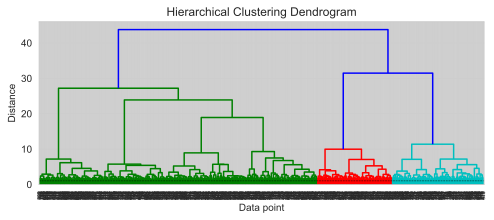

In [106]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [22]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

id  \
0     dlg-00055f4e-4a46-48bf-8d99-4e477663eb23   
1     dlg-0009352b-de51-474b-9f13-a2b0b2481546   
2     dlg-00123c7b-15a0-4f21-9002-a2509149ee2d   
3     dlg-0013673c-31c6-4565-8fac-810e173a5c53   
4     dlg-001d8bb1-6f25-4ecd-986a-b7eeb5fa4e19   
...                                        ...   
7703  dlg-ffc0c5fb-573f-40e0-b739-0e55d84100e8   
7704  dlg-ffc87550-389a-432e-927e-9a9438fc4f1f   
7705  dlg-ffcd1d53-c080-4acf-897d-48236513bc58   
7706  dlg-ffd9db94-36e3-4534-b99d-89f7560db17c   
7707  dlg-fffa6565-32bb-4592-8d30-fff66df29633   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Conversation  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                      Hi, I'm looking to book a table for Korean fod. Ok, what area are you thinking about? Somewhere in Southern NYC, maybe the East Village? Ok, great.  There's Thursday Kitchen, it has great reviews. That's great. So I need a table for tonight at 7 pm for 8 people. We don't want to sit at the bar, but anywhere else is fine. They don't have any availability for 7 pm. What times are available? 5 or 8. Yikes, we can't do those times. Ok, do you have a second choice? Let me check. Ok. Lets try Boka, are they free for 8 people at 7? Yes. Great, let's book that. Ok great, are there any other requests? No, that's it, just book. Great, should I use your account you have open with them? Yes please. Great. You will get a confirmation to your phone soon.    
1                                                                                                                                                                                                                Hi I would like to see if the Movie What Men Want is playing here. Yes it's showing here would you like to purchase a ticket? Yes, for me and a friend so two tickets please Okay. What time is that moving playing today? That movie is showing at 4, 5, and 8pm. Okay. Is there anymore movies showing around 8pm Yes , showing at 8pm is Green Book. What is that about? It's about two men dealing with racisim. Oh, no can you recommend anything else? What do you like? Well I like movies that are funny. Like comedies? Well no I like action as well. Okay. How to train your dragon is playing at 8pm. Okay can i get two tickets for that ? So you want me to cancel the tickets for What men want ? Yes please. Okay, no problem. How much will this cost. You said two adult tickets? Yes. Okay, that will be $20.80 Okay. Anything else I can help you with ? Y

# Topic Models

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

## Show topics and their weights

In [0]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

## Clustering documents using topic model features

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)